Lab 04 Part 1 & 2

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [35]:
X = df[['Machine_Weight_kg', 'Machine_Age_years', 'Rental_Price_per_Hour']]
y = df['Maintenance_Score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred = log_reg.predict(X_test_scaled)


In [37]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Cost function
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [38]:
# Gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for _ in range(iterations):
        gradient = (1/m) * (X.T @ (sigmoid(X @ theta) - y))
        theta -= learning_rate * gradient
        cost_history.append(compute_cost(theta, X, y))

    return theta, cost_history

X = np.c_[np.ones((X_train.shape[0], 1)), X_train_scaled]  # bias term
y = y_train.values.reshape(-1, 1)  # Convert y tocolumn vector

# Initialize theta(weights)
theta_init = np.zeros((X.shape[1], 1))

learning_rate = 0.1
iterations = 1000

theta_opt, cost_history = gradient_descent(X, y, theta_init, learning_rate, iterations)

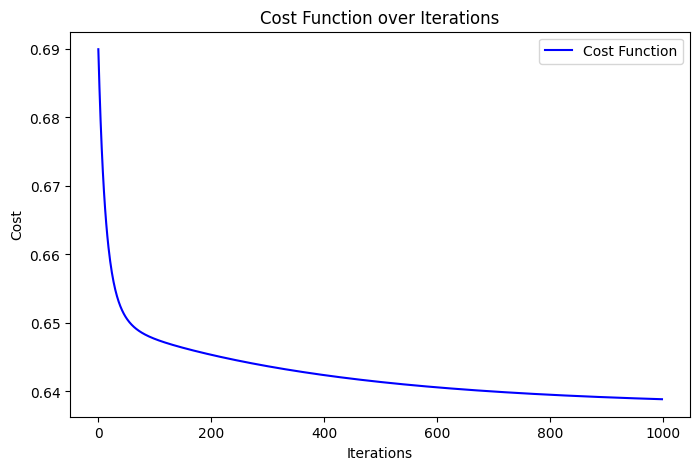

In [39]:
plt.figure(figsize=(8, 5))
plt.plot(range(iterations), cost_history, label="Cost Function", color="blue")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations")
plt.legend()
plt.show()

In [40]:
# Display final cost
compute_cost(theta_opt, X, y)
print("Final Cost:", compute_cost(theta_opt, X, y))

Final Cost: 0.6388639486431923


Lab 04 Part 3

In [41]:
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test_scaled]  # bias term
y_prob = sigmoid(X_test_bias @ theta_opt)
y_pred_custom = (y_prob >= 0.5).astype(int)

conf_matrix_custom = confusion_matrix(y_test, y_pred_custom)

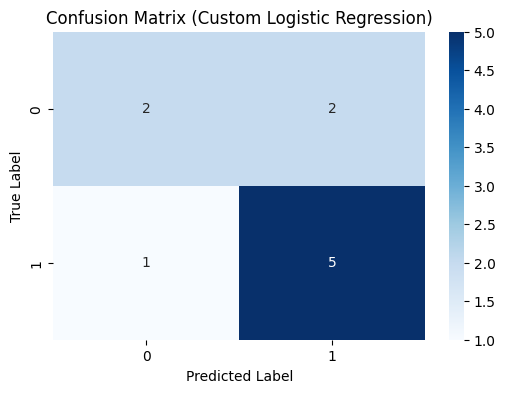

In [42]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_custom, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (Custom Logistic Regression)")
plt.show()


In [43]:
classification_report_custom = classification_report(y_test, y_pred_custom)
classification_report_custom

'              precision    recall  f1-score   support\n\n           0       0.67      0.50      0.57         4\n           1       0.71      0.83      0.77         6\n\n    accuracy                           0.70        10\n   macro avg       0.69      0.67      0.67        10\nweighted avg       0.70      0.70      0.69        10\n'